In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('accuracy_all.xlsx')
data = data.drop(columns='Unnamed: 0')

In [3]:
for i in range(len(data)):
    if np.mod(i,2):
        data.loc[i,'model'] = 'SDT'
    else:
        data.loc[i,'model'] = 'DT'
    if np.mod(i,8)==0 or np.mod(i,8)==1:
        data.loc[i,'noise'] = 'none'
    if np.mod(i,8)==2 or np.mod(i,8)==3:
        data.loc[i,'noise'] = 'root attacks'    
    if np.mod(i,8)==4 or np.mod(i,8)==5:
        data.loc[i,'noise'] = 'threshold variation'
    if np.mod(i,8)==6 or np.mod(i,8)==7:
        data.loc[i,'noise'] = 'both'

In [68]:
for i in range(len(data)):
    if np.mod(i,2):
            if np.mod(i,8)==0 or np.mod(i,8)==1:
                data.loc[i,'type'] = 'SDT w/o noise'
            if np.mod(i,8)==2 or np.mod(i,8)==3:
                data.loc[i,'type'] = 'SDT w/ root attacks'    
            if np.mod(i,8)==4 or np.mod(i,8)==5:
                data.loc[i,'type'] = 'SDT w/ threshold variation'
            if np.mod(i,8)==6 or np.mod(i,8)==7:
                data.loc[i,'type'] = 'SDT w/ both'
        
    else:
            if np.mod(i,8)==0 or np.mod(i,8)==1:
                data.loc[i,'type'] = 'DT w/o noise'
            if np.mod(i,8)==2 or np.mod(i,8)==3:
                data.loc[i,'type'] = 'DT w/ root attacks'    
            if np.mod(i,8)==4 or np.mod(i,8)==5:
                data.loc[i,'type'] = 'DT w/ threshold variation'
            if np.mod(i,8)==6 or np.mod(i,8)==7:
                data.loc[i,'type'] = 'DT w/ both'


In [86]:
std = []
mean = []
mean_sd=[]
for i in np.arange(6,21,2):
    dt_root_std = np.round(data[(data['model']=='DT')&(data['noise']=='root attacks')&(data['depth']==int(i))]['accuracy'].std(),2)
    sdt_root_std = np.round(data[(data['model']=='SDT')&(data['noise']=='root attacks')&(data['depth']==int(i))]['accuracy'].std(),2)
    dt_threshold_vatiation_std = np.round(data[(data['model']=='DT')&(data['noise']=='threshold variation')&(data['depth']==int(i))]['accuracy'].std(),2)
    sdt_threshold_vatiation_std = np.round(data[(data['model']=='SDT')&(data['noise']=='threshold variation')&(data['depth']==int(i))]['accuracy'].std(),2)
    dt_root_mean = np.round(data[(data['model']=='DT')&(data['noise']=='root attacks')&(data['depth']==int(i))]['accuracy'].mean(),2)
    sdt_root_mean = np.round(data[(data['model']=='SDT')&(data['noise']=='root attacks')&(data['depth']==int(i))]['accuracy'].mean(),2)
    dt_threshold_vatiation_mean = np.round(data[(data['model']=='DT')&(data['noise']=='threshold variation')&(data['depth']==int(i))]['accuracy'].mean(),2)
    sdt_threshold_vatiation_mean = np.round(data[(data['model']=='SDT')&(data['noise']=='threshold variation')&(data['depth']==int(i))]['accuracy'].mean(),2)
    std.append([dt_root_std,sdt_root_std,dt_threshold_vatiation_std,sdt_threshold_vatiation_std])
    mean.append([dt_root_mean,sdt_root_mean,dt_threshold_vatiation_mean,sdt_threshold_vatiation_mean])
    mean_sd.append([str(dt_root_mean)+'±'+str(dt_root_std),str(sdt_root_mean)+'±'+str(sdt_root_std),str(dt_threshold_vatiation_mean)+'±'+str(dt_threshold_vatiation_std),str(sdt_threshold_vatiation_mean)+'±'+str(sdt_threshold_vatiation_std),])

In [88]:
mean_sd = pd.DataFrame(mean_sd,columns=['DT_root','SDT_root','DT_drift','SDT_drift'])
mean_sd

,DT_root,SDT_root,DT_drift,SDT_drift
0,54.79±0.49,67.08±0.18,35.23±8.85,74.8±0.88
1,66.43±0.25,78.08±0.23,42.44±7.38,83.22±0.4
2,72.94±0.32,83.93±0.24,41.99±6.77,87.53±0.18
3,73.51±0.35,87.43±0.18,46.36±6.03,89.52±0.19
4,73.93±0.19,88.23±0.25,42.47±3.1,90.04±0.21
5,73.94±0.23,88.4±0.13,45.27±6.56,90.27±0.23
6,74.05±0.22,88.98±0.13,40.37±4.38,90.75±0.17
7,73.92±0.23,89.62±0.12,42.99±4.56,90.69±0.18


In [8]:
data[(data['depth']==20)&(data['type']=='SDT w/ root attacks')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='DT w/ root attacks')]['accuracy'].mean()

15.701999999999984

In [69]:
data[(data['depth']==20)&(data['type']=='DT w/o noise')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='DT w/ root attacks')]['accuracy'].mean()

14.340000000000003

In [70]:
data[(data['depth']==20)&(data['type']=='SDT w/o noise')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='SDT w/ root attacks')]['accuracy'].mean()

1.6380000000000194

In [71]:
data[(data['depth']==20)&(data['type']=='SDT w/ threshold variation')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='DT w/ threshold variation')]['accuracy'].mean()

47.7

In [72]:
data[(data['depth']==20)&(data['type']=='DT w/o noise')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='DT w/ threshold variation')]['accuracy'].mean()

45.269000000000005

In [11]:
data[(data['depth']==20)&(data['type']=='SDT w/ both')]['accuracy'].mean()-data[(data['depth']==20)&(data['type']=='DT w/ both')]['accuracy'].mean()

49.82299999999999

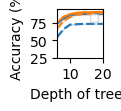

In [5]:
fig, ax  = plt.subplots(figsize=(1.1,1),constrained_layout=True)
# ax = ax.flatten()
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'font.size': 7})



select_data = data[(data['noise']=='none')|(data['noise']=='root attacks')]

# fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.lineplot(ax = ax, data=select_data,x=select_data['depth'],y=select_data['accuracy'],hue=select_data['model'],style=select_data['noise'])
# ax.set_xlabel('Depth of trees',fontsize=18)
ax.set_xlabel('Depth of trees')
ax.set_ylabel('Accuracy (%)')
ax.legend(loc='upper center',fontsize=6)
ax.legend([])

ax.set_ylim([25,95])
ax.set_xlim([6,20])
# plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major')
plt.savefig('./images/fig5a.svg',format='svg',transparent=True,bbox_inches='tight')

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\2063556334.py:22: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(ax = ax[0], data=data_DT,x='depth',y='accuracy',hue='noise',style='noise',
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\2063556334.py:28: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(ax = ax[1], data=data_SDT,x='depth',y='accuracy',hue='noise',style='noise',
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\2063556334.py:46: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(['w/o','_','w/'],title='Threshold \n variation',fontsize=5,title_fontsize=5,labelspacing=0.3,columnspacing=0.4

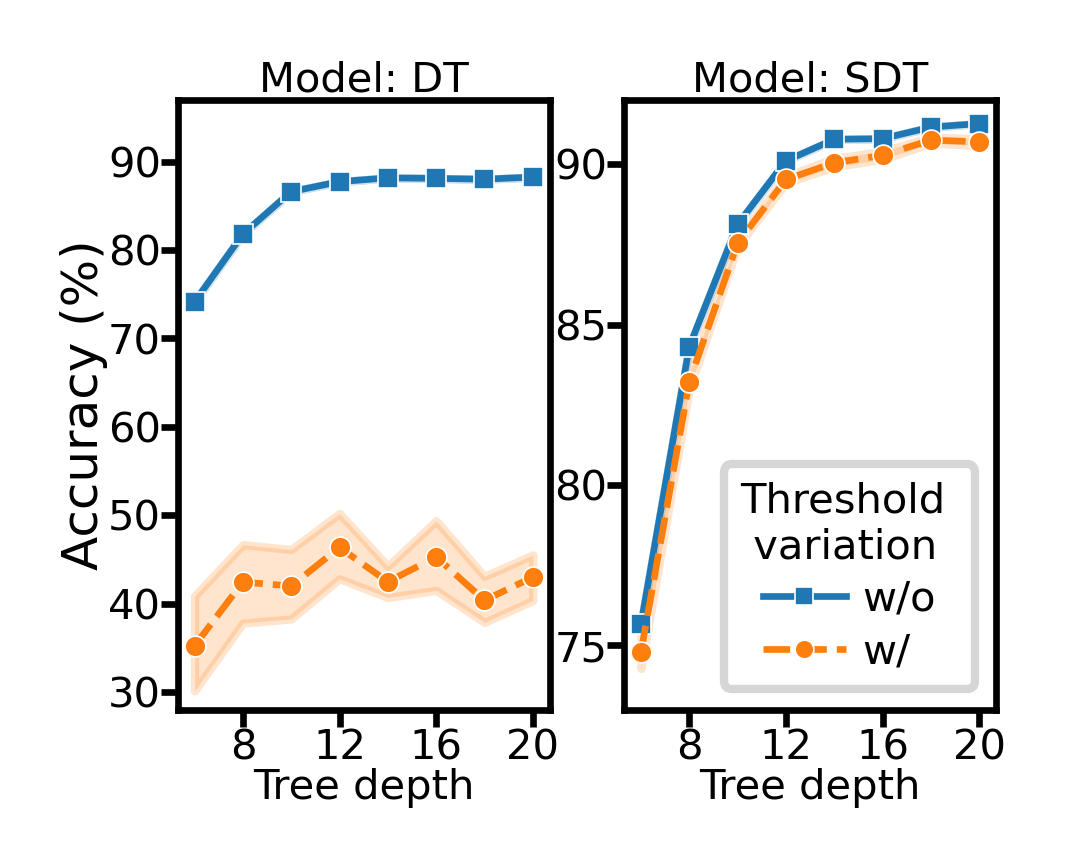

In [65]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
# 
fig, ax = plt.subplots(1,2,dpi=600,figsize=(1.76,1.32),sharex=True)
# ax[0].set_box_aspect(1.32/1.76*2)
# ax[1].set_box_aspect(1.32/1.76*2)

# fig, ax  = plt.subplots(figsize=(3.2,2.5),constrained_layout=True)
# ax = ax.flatten()
# plt.rcParams["font.family"] = "Helvetica"
# plt.rcParams.update({'font.size': 6})


select_data = data[(data['noise']=='none')|(data['noise']=='threshold variation')]
# select_data2 = data[(data['noise']=='none')|(data['noise']=='threshold variation')]
data_DT = select_data[(select_data['model']=='DT')]
data_SDT = select_data[(select_data['model']=='SDT')]
# fig, ax = plt.subplots()
# sns.set_style('whitegrid')
# plt.plot(data_DT['depth'],data_DT['accuracy'])
sns.lineplot(ax = ax[0], data=data_DT,x='depth',y='accuracy',hue='noise',style='noise',
            #  hue_order=['DT w/o noise','SDT w/o noise','DT w/ drifting thresholds','SDT w/ drifting thresholds'],
             markers=['s','o','s','o'],markersize=2.5,linewidth=0.8,markeredgewidth=0.2)

# left, bottom, width, height = 0.62, 0.48, 0.25, 0.25
# ax2 = fig.add_axes([left, bottom, width, height])
sns.lineplot(ax = ax[1], data=data_SDT,x='depth',y='accuracy',hue='noise',style='noise',
            #  hue_order=['DT w/o noise','SDT w/o noise','DT w/ drifting thresholds','SDT w/ drifting thresholds'],
             markers=['s','o','s','o'],markersize=2.5,linewidth=0.8,markeredgewidth=0.2)

# sns.relplot(ax=ax,
#     data=select_data,
#     x="depth", y="accuracy",
#     hue="noise", col="model",
#     kind="line",  height=1.76,markers=['s','o','s','o'],
#     aspect=.75, facet_kws=dict(sharex=False),
# )

ax[0].set_title("Model: DT",fontsize=5,pad=0)
ax[1].set_title("Model: SDT",fontsize=5,pad=0)
ax[0].set_xlabel('Tree depth',fontsize=5,labelpad=0)
ax[0].set_ylabel('Accuracy (%)',fontsize=6,labelpad=0)
ax[1].set_xlabel('Tree depth',fontsize=5,labelpad=0)
ax[1].set_ylabel('',fontsize=5,labelpad=0)
ax[1].legend(['w/o','_','w/'],title='Threshold \n variation',fontsize=5,title_fontsize=5,labelspacing=0.3,columnspacing=0.4,markerscale=0.9,handletextpad=0.4,loc='best')
# ax.legend([])
legend1 = ax[0].legend([])
# legend2 = ax[1].legend([])
legend1.set_visible(False)
# legend2.set_visible(False)
ax[0].set_ylim([28,97])
# ax.set_xlim([5.5,20.5])
# ax2.set_xlim([17,21])
ax[1].set_ylim([73,92])
# ax[1].set_ylim([28,97])
ax[0].tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax[0].tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
ax[1].tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax[1].tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
ax[0].set_xticks([8,12,16,20])
plt.savefig('./fig5b.svg',format='svg',transparent=True)
# plt.show()

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\740864802.py:24: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(ax = ax[0], data=data_DT,x='depth',y='accuracy',hue='noise',style='noise',
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\740864802.py:30: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(ax = ax[1], data=data_SDT,x='depth',y='accuracy',hue='noise',style='noise',
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_1374036\740864802.py:47: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(['w/o','_','w/'],title='Root attacks',fontsize=5,title_fontsize=5,labelspacing=0.3,columnspacing=0.4,markerscale=

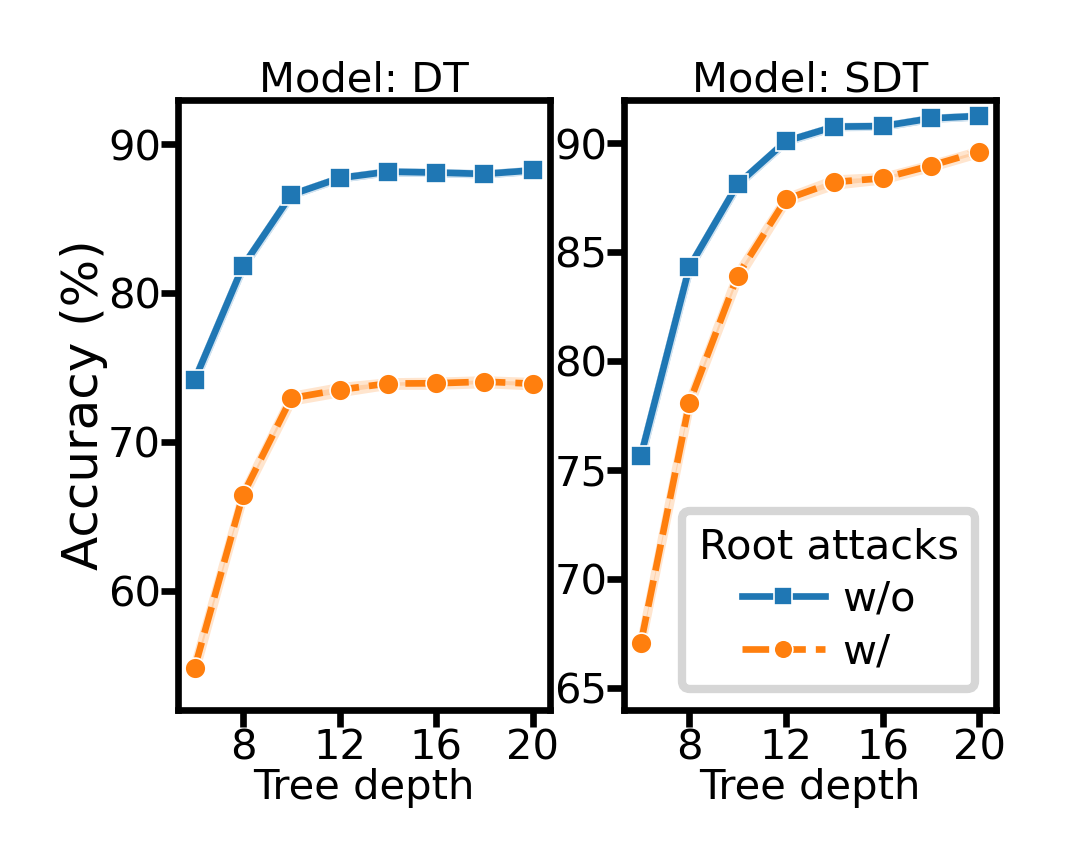

In [66]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
# 
# fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
fig, ax = plt.subplots(1,2,dpi=600,figsize=(1.76,1.32),sharex=True)
# ax.set_box_aspect(1.32/1.76)

# fig, ax  = plt.subplots(figsize=(3.2,2.5),constrained_layout=True)
# ax = ax.flatten()
# plt.rcParams["font.family"] = "Helvetica"
# plt.rcParams.update({'font.size': 6})


select_data = data[(data['noise']=='none')|(data['noise']=='root attacks')]
data_DT = select_data[(select_data['model']=='DT')]
data_SDT = select_data[(select_data['model']=='SDT')]
# select_data2 = data[(data['noise']=='none')|(data['noise']=='drifting thresholds')]
# fig, ax = plt.subplots()
# sns.set_style('whitegrid')

# sns.lineplot(ax = ax, data=select_data,x='depth',y='accuracy',hue='type',style='type',hue_order=['DT w/o noise','SDT w/o noise','DT w/ root attacks','SDT w/ root attacks'],markers=['s','o','s','o'],markersize=2.5,linewidth=0.8,markeredgewidth=0.2)

sns.lineplot(ax = ax[0], data=data_DT,x='depth',y='accuracy',hue='noise',style='noise',
            #  hue_order=['DT w/o noise','SDT w/o noise','DT w/ drifting thresholds','SDT w/ drifting thresholds'],
             markers=['s','o','s','o'],markersize=2.5,linewidth=0.8,markeredgewidth=0.2)

# left, bottom, width, height = 0.62, 0.48, 0.25, 0.25
# ax2 = fig.add_axes([left, bottom, width, height])
sns.lineplot(ax = ax[1], data=data_SDT,x='depth',y='accuracy',hue='noise',style='noise',
            #  hue_order=['DT w/o noise','SDT w/o noise','DT w/ drifting thresholds','SDT w/ drifting thresholds'],
             markers=['s','o','s','o'],markersize=2.5,linewidth=0.8,markeredgewidth=0.2)


# ax.set_xlabel('Depth of trees',fontsize=6,labelpad=0)
# ax.set_ylabel('Accuracy (%)',fontsize=6,labelpad=0)
# plt.legend(fontsize=5,title_fontsize=5,labelspacing=0.3,columnspacing=0.4,markerscale=0.9,handletextpad=0.4)
# ax.set_ylim([28,95])
# ax.set_xlim([5.5,20.5])

ax[0].set_title("Model: DT",fontsize=5,pad=0)
ax[1].set_title("Model: SDT",fontsize=5,pad=0)
ax[0].set_xlabel('Tree depth',fontsize=5,labelpad=0)
ax[0].set_ylabel('Accuracy (%)',fontsize=6,labelpad=0)
ax[1].set_xlabel('Tree depth',fontsize=5,labelpad=0)
ax[1].set_ylabel('',fontsize=5,labelpad=0)
ax[1].legend(['w/o','_','w/'],title='Root attacks',fontsize=5,title_fontsize=5,labelspacing=0.3,columnspacing=0.4,markerscale=0.9,handletextpad=0.4,loc='best')
# ax.legend([])
legend1 = ax[0].legend([])
# legend2 = ax[1].legend([])
legend1.set_visible(False)
ax[0].set_ylim([52,93])
# ax.set_xlim([5.5,20.5])
# ax2.set_xlim([17,21])
ax[1].set_ylim([64,92])
ax[0].tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax[0].tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
ax[1].tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax[1].tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
ax[0].set_xticks([8,12,16,20])
# plt.xticks([6,8,10,12,14,16,18,20])
plt.savefig('./fig5a.svg',format='svg',transparent=True)

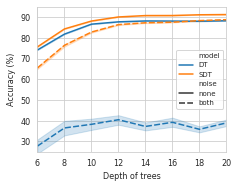

In [11]:
fig, ax  = plt.subplots(figsize=(3.2,2.5),constrained_layout=True)
# ax = ax.flatten()
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'font.size': 8})

select_data = data[(data['noise']=='none')|(data['noise']=='both')]

# fig, ax = plt.subplots()
sns.set_style('whitegrid')

sns.lineplot(ax = ax, data=select_data,x=select_data['depth'],y=select_data['accuracy'],hue=select_data['model'],style=select_data['noise'])
ax.set_xlabel('Depth of trees')
ax.set_ylabel('Accuracy (%)')
ax.legend(fontsize=7)
ax.set_ylim([25,95])
ax.set_xlim([6,20])
plt.tick_params(axis='both', which='major')
plt.savefig('./images/fig5c.svg',format='svg',transparent=True,bbox_inches='tight')

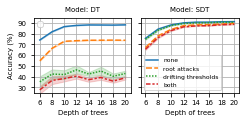

In [20]:

# g = sns.FacetGrid(data, col="model",hue='noise',height=1.8,aspect=1,sharey=True,despine=False)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.3, 1.6), sharey=True,constrained_layout=True)
plt.rcParams.update({'font.size': 7})
sns.lineplot(data=data[data['model']=='DT'],ax=ax1,x='depth',y='accuracy',hue='noise',style='noise')
sns.lineplot(data=data[data['model']=='SDT'],ax=ax2,x='depth',y='accuracy',hue='noise',style='noise')
# g.map(sns.lineplot, "depth",'accuracy',style='noise')
ax1.legend('')
ax1.grid('on')
ax2.grid('on')
ax2.legend(loc='best',fontsize=6)
# g.refline(y=90)
ax1.set_ylim(25,95)
ax1.set_xlim(5,21)
ax1.set_xticks(np.arange(6,22,2))
ax2.set_xticks(np.arange(6,22,2))
ax1.set_yticks(np.arange(30,100,10))
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Model: DT',fontsize=7)
ax2.set_title('Model: SDT',fontsize=7)
# g.axes[0][0].set_ylabel('Accuracy (%)')
ax1.set_xlabel('Depth of trees')
ax2.set_xlabel('Depth of trees')

plt.savefig('./images/fig8ab.svg',format='svg',transparent=True,bbox_inches='tight')
# g.add_legend(loc='best')
# g.set_xticklabels(np.arange(5,21,5))
# g.set_xticks(np.arange(5,21,5))

(0.0, 100.0)

In [42]:
help(g)

Help on FacetGrid in module seaborn.axisgrid object:

class FacetGrid(Grid)
 |  FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
 |  
 |  Multi-plot grid for plotting conditional relationships.
 |  
 |  Method resolution order:
 |      FacetGrid
 |      Grid
 |      _BaseGrid
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
 |      Initialize the matplotlib figure and FacetGrid obje